<div style="text-align:left;">

# <span style="text-decoration: underline;"><b>Projet de fin de formation</b></span>

</div>


## <b>Analyse e‑commerce 2023 vs 2024 — thelook_ecommerce </b>

### 1. Descriptions des variables
Commençons par importer notre jeu de données sous format csv et le convertir en DataFrame 

In [69]:
import pandas as pd


# Chargement du fichier csv
df = pd.read_csv("../data/thelook_fr_women_2023_2024.csv")
df.head()

,order_id,order_item_id,product_id,item_created_at,item_status,sale_price,cost,category,department,brand,product_name,order_status,order_created_at,shipped_at,delivered_at,user_id,gender,country,state,city
0,19425,28112,6983,2023-01-01 06:18:03+00:00,Shipped,29.500000,16.048000,Shorts,Women,Fox,Fox Juniors Momentum Short,Shipped,2022-12-29 10:00:00+00:00,2022-12-30 11:29:00+00:00,NaN,15644,F,France,Centre-Val de Loire,Corquilleroy
1,19425,28113,10597,2023-01-01 06:44:58+00:00,Shipped,20.000000,10.000000,Intimates,Women,Wacoal,Wacoal Women's B-Smooth Bralette,Shipped,2022-12-29 10:00:00+00:00,2022-12-30 11:29:00+00:00,NaN,15644,F,France,Centre-Val de Loire,Corquilleroy
2,4710,6730,11792,2023-01-03 04:44:50+00:00,Complete,38.000000,18.468000,Intimates,Women,American Apparel,American Apparel Striped Chiffon Tank,Complete,2023-01-03 08:12:00+00:00,2023-01-03 09:14:00+00:00,2023-01-04 03:03:00+00:00,3853,F,France,Île-de-France,Paris
3,16618,24006,329,2023-01-03 15:13:39+00:00,Complete,27.990000,16.402140,Tops & Tees,Women,Tri-Mountain,Tri-Mountain Women's 3/4-Sleeve Pique Knit Pol...,Complete,2023-01-03 18:58:00+00:00,2023-01-05 13:23:00+00:00,2023-01-09 10:25:00+00:00,13422,F,France,Hauts-de-France,Comines
4,4710,6731,5295,2023-01-05 06:43:09+00:00,Complete,56.880001,29.577601,Pants & Capris,Women,Lauren by Ralph Lauren,Lauren Ralph Lauren Velour Pants,Complete,2023-01-03 08:12:00+00:00,2023-01-03 09:14:00+00:00,2023-01-04 03:03:00+00:00,3853,F,France,Île-de-France,Paris


Une fois notre DataFrame créé, intéressons-nous aux colonnes grace à la méthode .info de pandas et en créant ensuite un dictionnaire les décrivant (définition, type, exemple).

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679 entries, 0 to 1678
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          1679 non-null   int64  
 1   order_item_id     1679 non-null   int64  
 2   product_id        1679 non-null   int64  
 3   item_created_at   1679 non-null   object 
 4   item_status       1679 non-null   object 
 5   sale_price        1679 non-null   float64
 6   cost              1679 non-null   float64
 7   category          1679 non-null   object 
 8   department        1679 non-null   object 
 9   brand             1677 non-null   object 
 10  product_name      1679 non-null   object 
 11  order_status      1679 non-null   object 
 12  order_created_at  1679 non-null   object 
 13  shipped_at        1133 non-null   object 
 14  delivered_at      636 non-null    object 
 15  user_id           1679 non-null   int64  
 16  gender            1679 non-null   object 


On observe déjà que l'essentiel des valeurs manquantes se trouve dans les deux variables shipped_at et delivered_at, ce qui n'est pas surprenant si on considère qu'un certain nombre de commandes n'ont pas encore été expédiées et livrées au moment de l'extraction des bases.

On créé maintenant notre dictionnaire de données permettant de décrire les colonnes :

In [71]:
# Création du dictionnaire
dict = pd.DataFrame({
    "colonne": df.columns.to_list(),
    "type_python": df.dtypes.values,
    "nb_valeurs_non_nulles": df.count().values,
    "exemple": df.apply(lambda c: c.dropna().iloc[0] if c.dropna().size > 0 else None).values
})
dict


,colonne,type_python,nb_valeurs_non_nulles,exemple
0,order_id,int64,1679,19425
1,order_item_id,int64,1679,28112
2,product_id,int64,1679,6983
3,item_created_at,object,1679,2023-01-01 06:18:03+00:00
4,item_status,object,1679,Shipped
5,sale_price,float64,1679,29.5
6,cost,float64,1679,16.048
7,category,object,1679,Shorts
8,department,object,1679,Women
9,brand,object,1677,Fox


In [72]:
# Ajout des définitions métiers
definitions = {
    "order_id": "Identifiant unique de la commande. Une même commande peut contenir plusieurs lignes.",
    "order_item_id": "Identifiant unique de la ligne de commande (item).",
    "product_id": "Identifiant unique du produit vendu.",
    "item_created_at": "Date et heure de création de la ligne de commande.",
    "item_status": "Statut de la ligne de commande (Shipped, Cancelled, Returned…).",
    "sale_price": "Prix de vente facturé au client pour cette ligne de commande.",
    "cost": "Coût interne du produit pour l’entreprise (achat ou production).",
    "category": "Catégorie du produit (Shorts, T-shirts…).",
    "department": "Département / segment marché (Women, Men, Kids…).",
    "brand": "Marque du produit.",
    "product_name": "Nom commercial du produit.",
    "order_status": "Statut global de la commande (Shipped, Processing, Cancelled…).",
    "order_created_at": "Date de création de la commande.",
    "shipped_at": "Date d’expédition de la commande ou de la ligne.",
    "delivered_at": "Date de livraison au client.",
    "user_id": "Identifiant unique du client.",
    "gender": "Genre déclaré du client.",
    "country": "Pays de livraison.",
    "state": "Région / État administratif de livraison.",
    "city": "Ville de livraison."
}

In [73]:
# Ajout au DataFrame
dict["definition"] = dict["colonne"].map(definitions)

dict

,colonne,type_python,nb_valeurs_non_nulles,exemple,definition
0,order_id,int64,1679,19425,Identifiant unique de la commande. Une même co...
1,order_item_id,int64,1679,28112,Identifiant unique de la ligne de commande (it...
2,product_id,int64,1679,6983,Identifiant unique du produit vendu.
3,item_created_at,object,1679,2023-01-01 06:18:03+00:00,Date et heure de création de la ligne de comma...
4,item_status,object,1679,Shipped,"Statut de la ligne de commande (Shipped, Cance..."
5,sale_price,float64,1679,29.5,Prix de vente facturé au client pour cette lig...
6,cost,float64,1679,16.048,Coût interne du produit pour l’entreprise (ach...
7,category,object,1679,Shorts,"Catégorie du produit (Shorts, T-shirts…)."
8,department,object,1679,Women,"Département / segment marché (Women, Men, Kids…)."
9,brand,object,1677,Fox,Marque du produit.


### 2. Qualité des données

#### 2.1. Traitement des doublons
On va chercher dans un premier temps à voir s'il existe des observations intégralement dupliquées.

In [74]:
# Recherche d'observations intégralement dupliquées 
print(f"Il y a {df.duplicated().sum()} ligne(s) intégralement dupliquée(s)")

Il y a 0 ligne(s) intégralement dupliquée(s)


On voit qu'il n'y a aucune ligne intégralement dupliquée. On pourrait maintenant chercher à avoir le nombre de modalités uniques par colonne pour savoir s'il existe des observations partiellement dupliquées sur des variables censées être uniques.

In [75]:
for col in df.columns.to_list():
    print(f'Colonne {col} : {df[col].nunique()}')

Colonne order_id : 1117
Colonne order_item_id : 1679
Colonne product_id : 1573
Colonne item_created_at : 1679
Colonne item_status : 5
Colonne sale_price : 703
Colonne cost : 1561
Colonne category : 22
Colonne department : 1
Colonne brand : 657
Colonne product_name : 1559
Colonne order_status : 5
Colonne order_created_at : 1117
Colonne shipped_at : 747
Colonne delivered_at : 416
Colonne user_id : 868
Colonne gender : 1
Colonne country : 1
Colonne state : 13
Colonne city : 547


On observe que order_id a des valeurs qui se répètent car il en existe 1117 uniques sur 1679 lignes avec aucune valeur manquante, ce qui est normal car le numéro de commande peut concerner plusieurs articles. La variable order_item_id a bien 1679 modalités uniques ce qui est bon signe car ce numéro est censé être unique pour un article d'une commande donnée. La colonne product_id contient des doublons mais cela doit certainement venir du fait que des produits ont été commandés par plusieurs personnes différentes dans des commandes séparées, ce que nous allons vérifier.

In [76]:
# Recherche de doublons de product_id avec mise en ordre
df[df.duplicated(subset=["product_id"], keep=False)].sort_values(by="product_id", ascending=True)

,order_id,order_item_id,product_id,item_created_at,item_status,sale_price,cost,category,department,brand,product_name,order_status,order_created_at,shipped_at,delivered_at,user_id,gender,country,state,city
771,76498,111095,248,2024-01-30 10:43:28+00:00,Complete,7.900000,4.092200,Tops & Tees,Women,Tresics,Tresics Camisole With Built In Bra sc1410,Complete,2024-01-27 13:13:00+00:00,2024-01-28 02:14:00+00:00,2024-01-28 09:49:00+00:00,61245,F,France,Hauts-de-France,Lille
578,31339,45463,248,2023-11-11 04:00:06+00:00,Shipped,7.900000,4.092200,Tops & Tees,Women,Tresics,Tresics Camisole With Built In Bra sc1410,Shipped,2023-11-11 06:56:00+00:00,2023-11-13 19:36:00+00:00,NaN,25182,F,France,Auvergne-Rhône-Alpes,Lyon
585,18092,26160,319,2023-11-13 14:54:04+00:00,Shipped,27.590000,14.153670,Tops & Tees,Women,Patty,Patty Women Sexiest & Stunning Lace Back Ruche...,Shipped,2023-11-11 18:41:00+00:00,2023-11-14 02:00:00+00:00,NaN,14607,F,France,Grand Est,Illfurth
1613,107850,156620,319,2024-12-10 07:30:53+00:00,Shipped,27.590000,14.153670,Tops & Tees,Women,Patty,Patty Women Sexiest & Stunning Lace Back Ruche...,Shipped,2024-12-09 08:46:00+00:00,2024-12-11 22:57:00+00:00,NaN,86210,F,France,Auvergne-Rhône-Alpes,Arpajon-sur-Cère
1557,17381,25141,476,2024-11-24 02:11:03+00:00,Complete,39.000000,20.241000,Tops & Tees,Women,Coolibar,Coolibar UPF 50+ Women's Long Sleeve T-Shirt -...,Complete,2024-11-24 02:57:00+00:00,2024-11-26 22:24:00+00:00,2024-11-28 00:00:00+00:00,14039,F,France,Bretagne,Bain-de-Bretagne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,124414,180676,15313,2024-12-26 14:13:00+00:00,Cancelled,9.120000,4.632960,Plus,Women,Foot Traffic,Soft and Warm Microfiber Fuzzy Socks in Your C...,Cancelled,2024-12-26 16:58:00+00:00,NaN,NaN,99420,F,France,Bourgogne-Franche-Comté,Dijon
283,99905,145110,15688,2023-06-07 04:59:43+00:00,Cancelled,35.000000,15.890000,Plus,Women,Olga,Olga Women's Signature Support Bra,Cancelled,2023-06-06 06:45:00+00:00,NaN,NaN,79825,F,France,Nouvelle-Aquitaine,Lons
989,26750,38799,15688,2024-05-14 08:04:07+00:00,Complete,35.000000,15.890000,Plus,Women,Olga,Olga Women's Signature Support Bra,Complete,2024-05-10 09:08:00+00:00,2024-05-12 04:45:00+00:00,2024-05-13 22:33:00+00:00,21516,F,France,Pays de la Loire,Saint-Sébastien-sur-Loire
387,28985,42048,15945,2023-08-08 15:32:40+00:00,Cancelled,89.989998,46.794799,Plus,Women,Oakley,Oakley Men's Square Wire Iridium Sunglasses,Cancelled,2023-08-08 16:14:00+00:00,NaN,NaN,23276,F,France,Auvergne-Rhône-Alpes,Mercury


On observe bien que des produits ont été commandés par plusieurs personnes différentes dans des commandes différentes. Pour avoir une meilleure idée du nombre de commandes par produit, utilisons value_count.

In [77]:
# Répartion du nombre de commandes par produit
df["product_id"].value_counts()[df["product_id"].value_counts() > 1]


product_id
14288    3
9567     3
8146     3
5295     2
2078     2
        ..
12002    2
8877     2
15313    2
7536     2
5559     2
Name: count, Length: 103, dtype: int64

Il existe trois produits au total qui ont été commandé trois fois et le reste deux fois.
Il serait également intéressant de vérifier l'unicité du sous DataFrame composé des colonnes ["order_id", "order_item_id", "product_id"]

In [78]:
columns = ["order_id", "order_item_id", "product_id"]
df.duplicated(subset=columns, keep=False).sum()

np.int64(0)

Les observations du sous DataFrame composé des colonnes ["order_id", "order_item_id", "product_id"] sont uniques ce qui est une bonne chose.

#### 2.2. Traitement des valeurs manquantes
On va maintenant chercher à savoir s'il existe des valeurs maquantes et comment les traiter. On a vu que pour certains champs comme shipped_at et delivered_at, il était normal d'avoir des valeurs manquantes, il s'agira simplement de leur imputer la valeur "missing". On en observe en revanche deux dans le champ "Brand". Cherchons alors la meilleure méthode d'imputation pour ces deux observations. 

In [79]:
# Affichage des observations où on a pas d'information concernant la variable brand
df[df["brand"].isna()]

,order_id,order_item_id,product_id,item_created_at,item_status,sale_price,cost,category,department,brand,product_name,order_status,order_created_at,shipped_at,delivered_at,user_id,gender,country,state,city
320,40643,58980,755,2023-06-24 08:17:59+00:00,Returned,28.950001,15.14085,Tops & Tees,Women,NaN,The Very Hungry Caterpillar Classic Book Women...,Returned,2023-06-24 08:55:00+00:00,2023-06-24 20:32:00+00:00,2023-06-28 18:54:00+00:00,32624,F,France,Île-de-France,Paris
1237,25047,36362,13863,2024-08-12 09:56:12+00:00,Complete,24.250000,9.55450,Accessories,Women,NaN,Husky Animal Hat with Mittens,Complete,2024-08-12 13:30:00+00:00,2024-08-15 12:12:00+00:00,2024-08-18 05:02:00+00:00,20152,F,France,Île-de-France,Vélizy-Villacoublay


Une première stratégie d'imputation serait de chercher si ces produits se retrouvent ailleurs dans le DataFrame et imputer leur valeur de brand.

In [80]:
(df["product_id"]==755).sum()


np.int64(1)

In [81]:
(df["product_id"]==13863).sum()

np.int64(1)

Ces produits sont uniques, on ne peut donc pas imputer avec la valeur de brand hypothétique. On va donc se contenter de remplacer par missing.

In [82]:
# imputation pâr missing
df.fillna({"brand": "missing"}, inplace=True)

In [83]:
# Affichage des observations où on a pas d'information concernant la variable brand
df[df["brand"]=="missing"]

,order_id,order_item_id,product_id,item_created_at,item_status,sale_price,cost,category,department,brand,product_name,order_status,order_created_at,shipped_at,delivered_at,user_id,gender,country,state,city
320,40643,58980,755,2023-06-24 08:17:59+00:00,Returned,28.950001,15.14085,Tops & Tees,Women,missing,The Very Hungry Caterpillar Classic Book Women...,Returned,2023-06-24 08:55:00+00:00,2023-06-24 20:32:00+00:00,2023-06-28 18:54:00+00:00,32624,F,France,Île-de-France,Paris
1237,25047,36362,13863,2024-08-12 09:56:12+00:00,Complete,24.250000,9.55450,Accessories,Women,missing,Husky Animal Hat with Mittens,Complete,2024-08-12 13:30:00+00:00,2024-08-15 12:12:00+00:00,2024-08-18 05:02:00+00:00,20152,F,France,Île-de-France,Vélizy-Villacoublay


De même, nous allons imputer par la valeur "missing" les colonnes shipped_at et delivered_at.

In [84]:
# Création des colonnes 
#column = ["shipped_at", "delivered_at"]

# Faites une boucle pour imputer de manière automatique
#for c in column :

    # imputation pâr missing
#    df.fillna({c: "missing"}, inplace=True)

#### 2.3. Format de dates et bornes temporelles
Vérifions à présent si les dates correspondent au bon format et la cohérence des bornes temporelles. 

In [85]:
df.dtypes

order_id              int64
order_item_id         int64
product_id            int64
item_created_at      object
item_status          object
sale_price          float64
cost                float64
category             object
department           object
brand                object
product_name         object
order_status         object
order_created_at     object
shipped_at           object
delivered_at         object
user_id               int64
gender               object
country              object
state                object
city                 object
dtype: object

La date est au format objet, ce qui n'est pas très pratique pour trier notre DataFrame

In [86]:
col = ["item_created_at", "order_created_at", "shipped_at", "delivered_at"]

# Formatage de la date et vérification des bornes temporelles

for c in col:
    dates = pd.to_datetime(df[c], errors='coerce')
    df[c] = dates
    print(f"La date la plus ancienne de {c} est : {dates.min()} \nLa date la plus récente de {c} est : {dates.max()}\n")

# Contrôle du type des données
df.dtypes

La date la plus ancienne de item_created_at est : 2023-01-01 06:18:03+00:00 
La date la plus récente de item_created_at est : 2024-12-31 10:40:48+00:00

La date la plus ancienne de order_created_at est : 2022-12-29 10:00:00+00:00 
La date la plus récente de order_created_at est : 2024-12-31 05:13:00+00:00

La date la plus ancienne de shipped_at est : 2022-12-30 11:29:00+00:00 
La date la plus récente de shipped_at est : 2025-01-02 02:26:00+00:00

La date la plus ancienne de delivered_at est : 2023-01-04 03:03:00+00:00 
La date la plus récente de delivered_at est : 2025-01-02 13:06:00+00:00



order_id                          int64
order_item_id                     int64
product_id                        int64
item_created_at     datetime64[ns, UTC]
item_status                      object
sale_price                      float64
cost                            float64
category                         object
department                       object
brand                            object
product_name                     object
order_status                     object
order_created_at    datetime64[ns, UTC]
shipped_at          datetime64[ns, UTC]
delivered_at        datetime64[ns, UTC]
user_id                           int64
gender                           object
country                          object
state                            object
city                             object
dtype: object

Les dates sont maintenant au bon format. On voit cependant qu'il existe des outliers car certaines bornes temporelles sont avant 2023 et certaines après 2024.
Cherchons à savoir combien de dates sont concernées.

In [87]:
for c in col:
    print(f"Colonne {c} : {(df[c] < '2023-01-01 00:00:00+00:00').sum()} dates antérieures à 2023 et {(df[c] > '2025-01-01 00:00:00+00:00').sum()} postérieures à 2024")
    

Colonne item_created_at : 0 dates antérieures à 2023 et 0 postérieures à 2024
Colonne order_created_at : 2 dates antérieures à 2023 et 0 postérieures à 2024
Colonne shipped_at : 2 dates antérieures à 2023 et 2 postérieures à 2024
Colonne delivered_at : 0 dates antérieures à 2023 et 2 postérieures à 2024


Très peu de dates sont concernées par le fait de ne pas appartenir au périmètre indiqué par le métier et que quand c'est le cas c'est toujours 1 ou 2 jours maximum avant/après les bornes.

Nous avons désormais mis en forme, controlé et nettoyé nos données. Il est temps à présent de se lancer dans l'exploration descriptive.

### 3. Explorations descriptives

In [88]:
df[["sale_price", "cost"]].describe()

,sale_price,cost
count,1679.000000,1679.000000
mean,57.021769,27.460066
std,69.682245,31.854450
min,1.820000,0.749840
25%,19.990000,9.681000
50%,38.000000,18.230800
75%,68.000000,33.232345
max,903.000000,437.052001


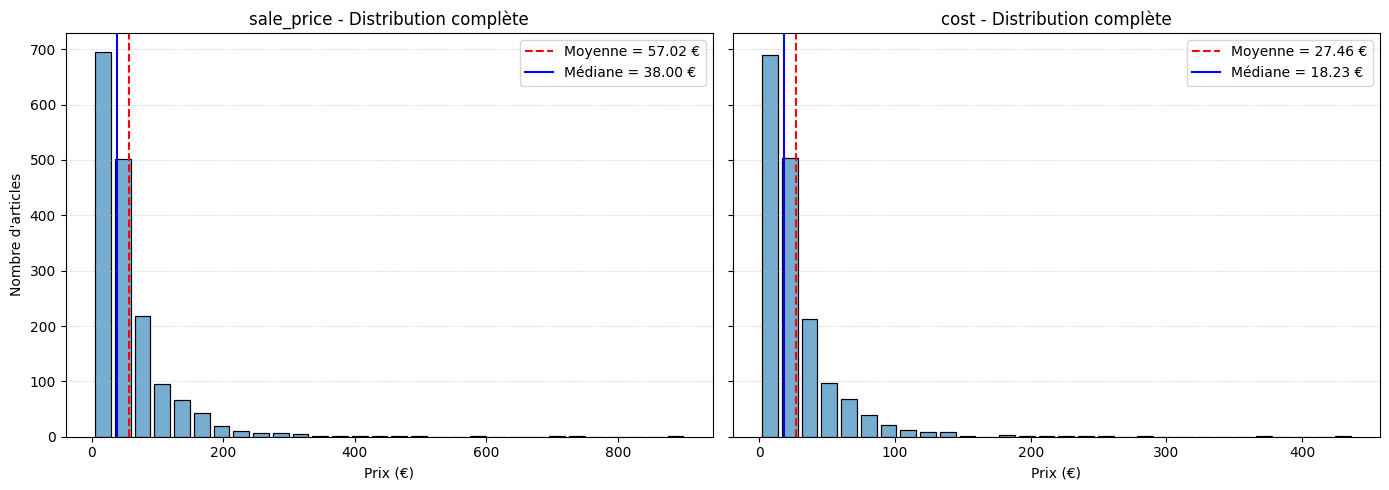

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Colonnes à étudier
colonnes = ["sale_price", "cost"]  # remplace par ta 2e colonne

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

for ax, col in zip(axes, colonnes):
    x = df[col].dropna()

    # Statistiques
    mean = x.mean()
    median = x.median()

    # Histogramme Seaborn
    sns.histplot(
        x,
        bins=30,
        shrink=0.8,
        edgecolor='black',
        alpha=0.6,
        ax=ax
    )

    # Lignes moyenne et médiane
    ax.axvline(mean, linestyle="--", color='red', label=f"Moyenne = {mean:.2f} €")
    ax.axvline(median, linestyle="-", color='blue', label=f"Médiane = {median:.2f} €")

    # Lignes horizontales discrètes
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

    # Titres et labels
    ax.set_title(f"{col} - Distribution complète")
    ax.set_xlabel("Prix (€)")
    ax.set_ylabel("Nombre d'articles")
    ax.legend()

plt.tight_layout()
plt.show()


La distribution du prix de vente est fortement asymétrique à droite, avec une majorité d’articles vendus à des prix modérés et quelques produits à prix élevés.
La médiane est inférieure à la moyenne, ce qui confirme la présence de valeurs extrêmes.

Le coût présente une distribution similaire mais concentrée sur des valeurs plus faibles, ce qui est cohérent avec la structure des marges en e-commerce.

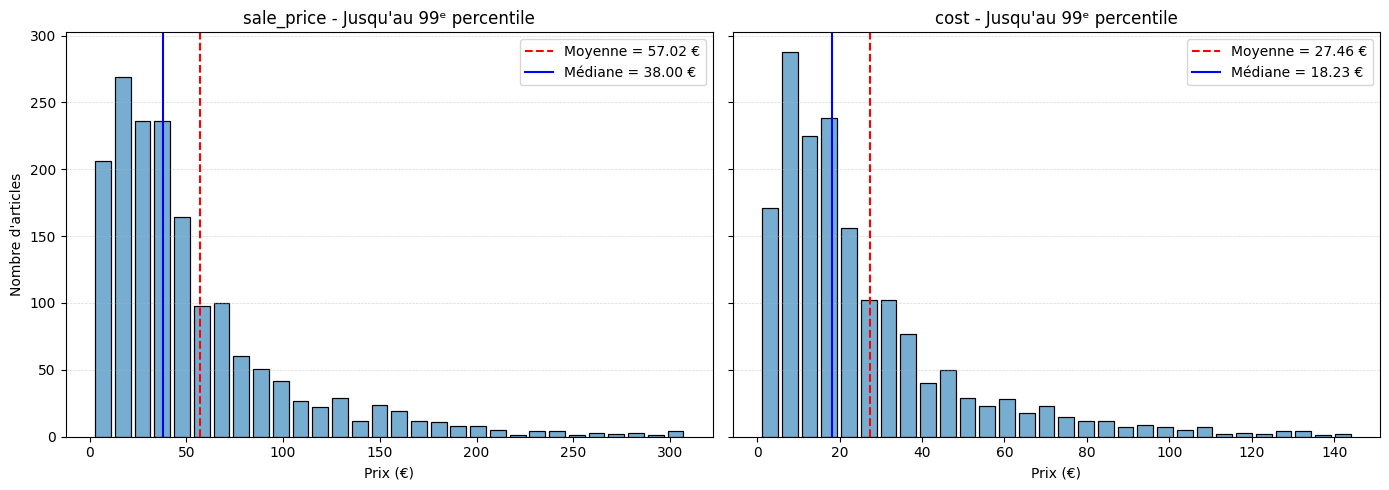

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

for ax, col in zip(axes, colonnes):
    x = df[col].dropna()

    # Quantile 99
    q99 = x.quantile(0.99)
    x_zoom = x[x <= q99]

    # Statistiques
    mean = x.mean()
    median = x.median()

    # Histogramme Seaborn
    sns.histplot(
        x_zoom,
        bins=30,
        shrink=0.8,
        edgecolor='black',
        alpha=0.6,
        ax=ax
    )

    # Lignes moyenne et médiane
    ax.axvline(mean, linestyle="--", color='red', label=f"Moyenne = {mean:.2f} €")
    ax.axvline(median, linestyle="-", color='blue', label=f"Médiane = {median:.2f} €")

    # Lignes horizontales discrètes
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

    # Titres et labels
    ax.set_title(f"{col} - Jusqu'au 99ᵉ percentile")
    ax.set_xlabel("Prix (€)")
    ax.set_ylabel("Nombre d'articles")
    ax.legend()

plt.tight_layout()
plt.show()


Boxplots à faire

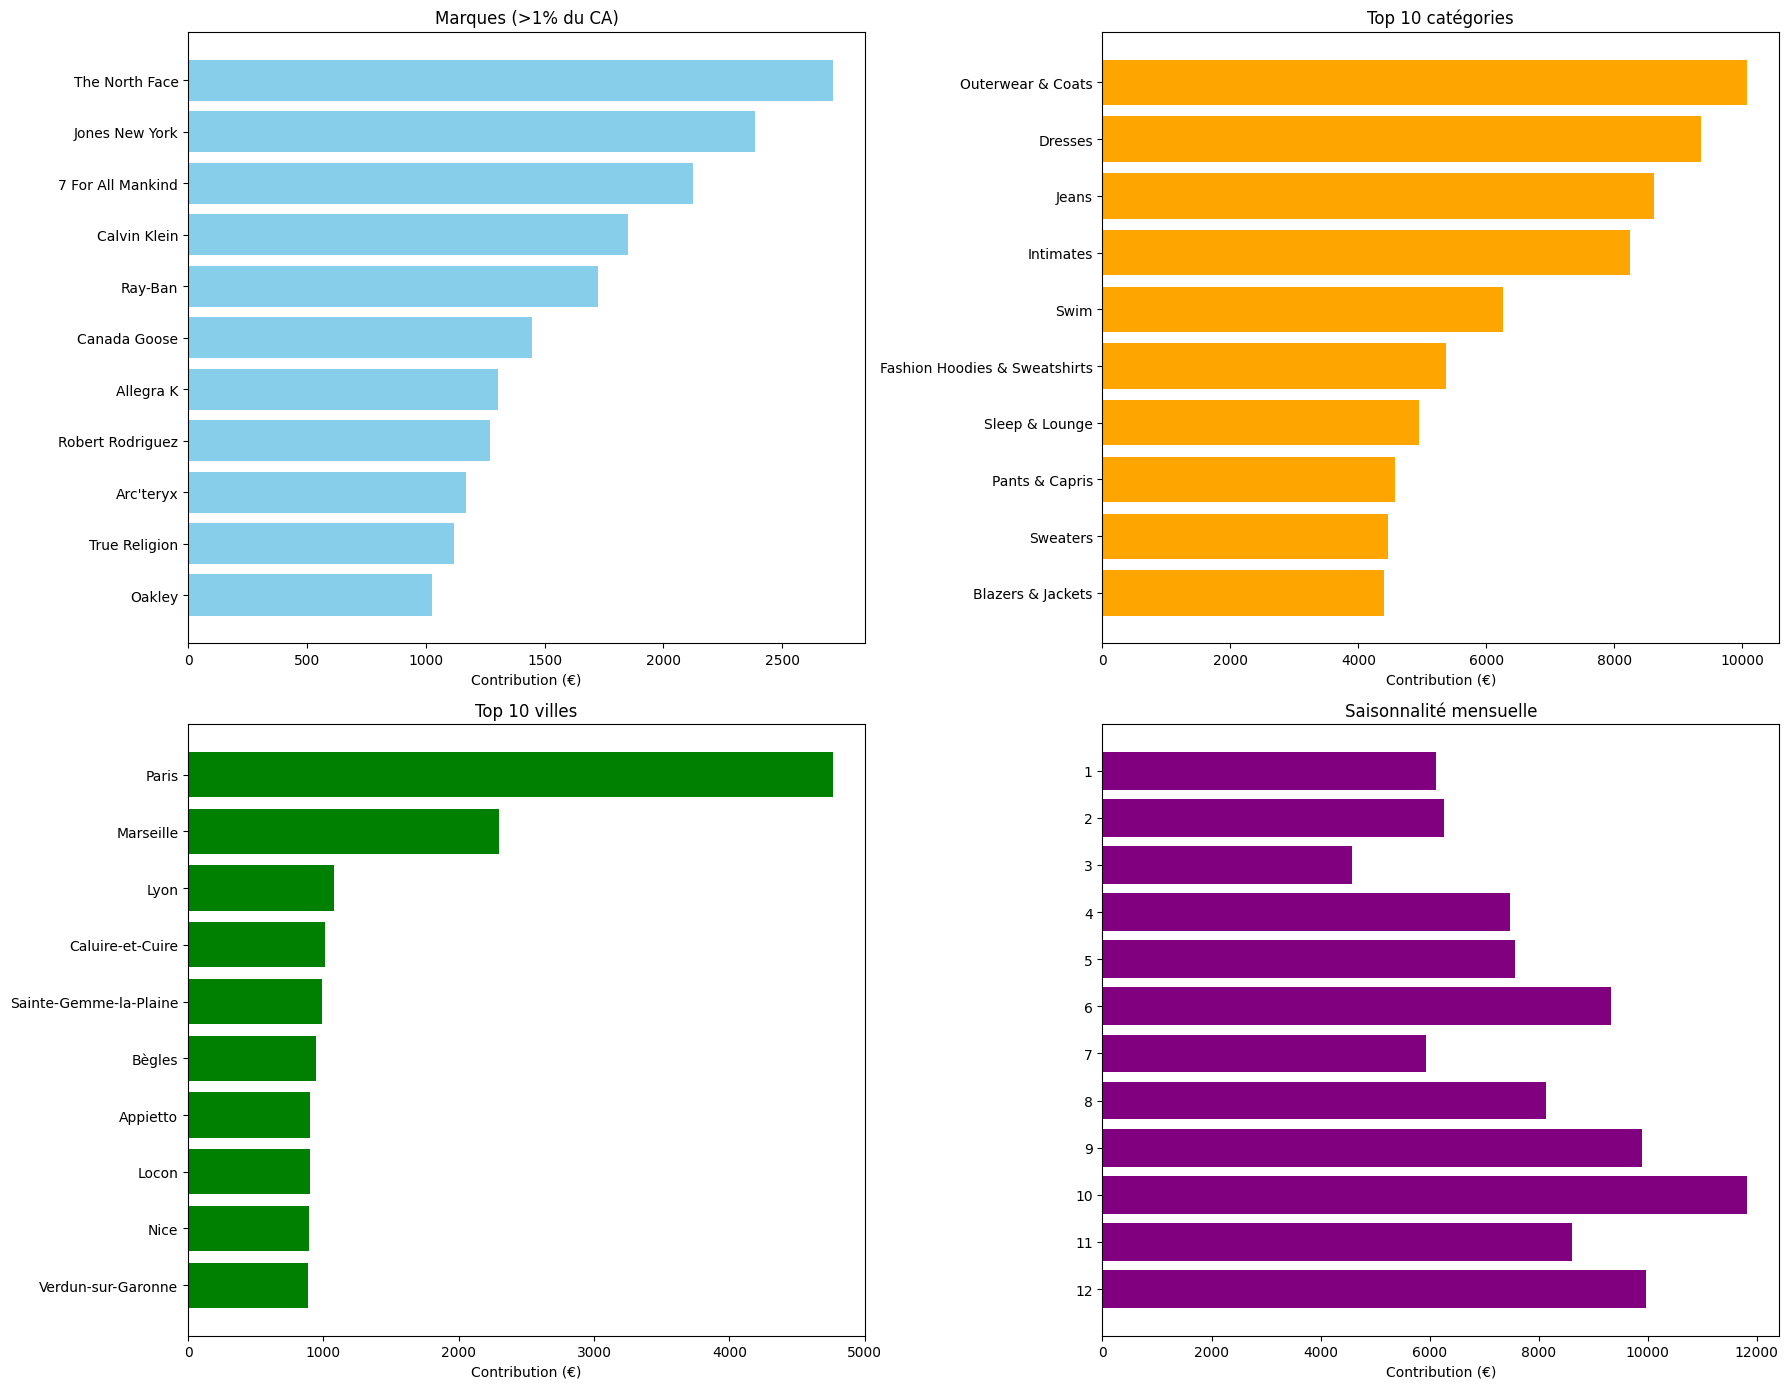

In [107]:
# -------------------------
# Préparation des données
# -------------------------

# Marques (>1% du CA pour filtrer, MAIS valeurs en €)
marque_contrib = df.groupby('brand')['sale_price'].sum().sort_values(ascending=False)
total_ventes = marque_contrib.sum()
marque_top = marque_contrib[marque_contrib / total_ventes > 0.01]

# Catégories (top 10)
categorie_contrib = df.groupby('category')['sale_price'].sum().sort_values(ascending=False)
categorie_top = categorie_contrib.head(10)

# Villes (top 10)
ville_contrib = df.groupby('city')['sale_price'].sum().sort_values(ascending=False)
ville_top = ville_contrib.head(10)

# Saisonnalité mensuelle
df['order_created_at'] = pd.to_datetime(df['order_created_at'])
df['month'] = df['order_created_at'].dt.month
month_contrib = df.groupby('month')['sale_price'].sum().sort_index()

# -------------------------
# Création des subplots
# -------------------------
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# --- Marques ---
axes[0,0].barh(marque_top.index, marque_top.values, color='skyblue')
axes[0,0].invert_yaxis()
axes[0,0].set_title("Marques (>1% du CA)")
axes[0,0].set_xlabel("Contribution (€)")

# --- Catégories ---
axes[0,1].barh(categorie_top.index, categorie_top.values, color='orange')
axes[0,1].invert_yaxis()
axes[0,1].set_title("Top 10 catégories")
axes[0,1].set_xlabel("Contribution (€)")

# --- Villes ---
axes[1,0].barh(ville_top.index, ville_top.values, color='green')
axes[1,0].invert_yaxis()
axes[1,0].set_title("Top 10 villes")
axes[1,0].set_xlabel("Contribution (€)")

# --- Saisonnalité mensuelle ---
axes[1,1].barh(month_contrib.index.astype(str), month_contrib.values, color='purple')
axes[1,1].invert_yaxis()
axes[1,1].set_title("Saisonnalité mensuelle")
axes[1,1].set_xlabel("Contribution (€)")

plt.tight_layout()
plt.show()


Même chose mais en %

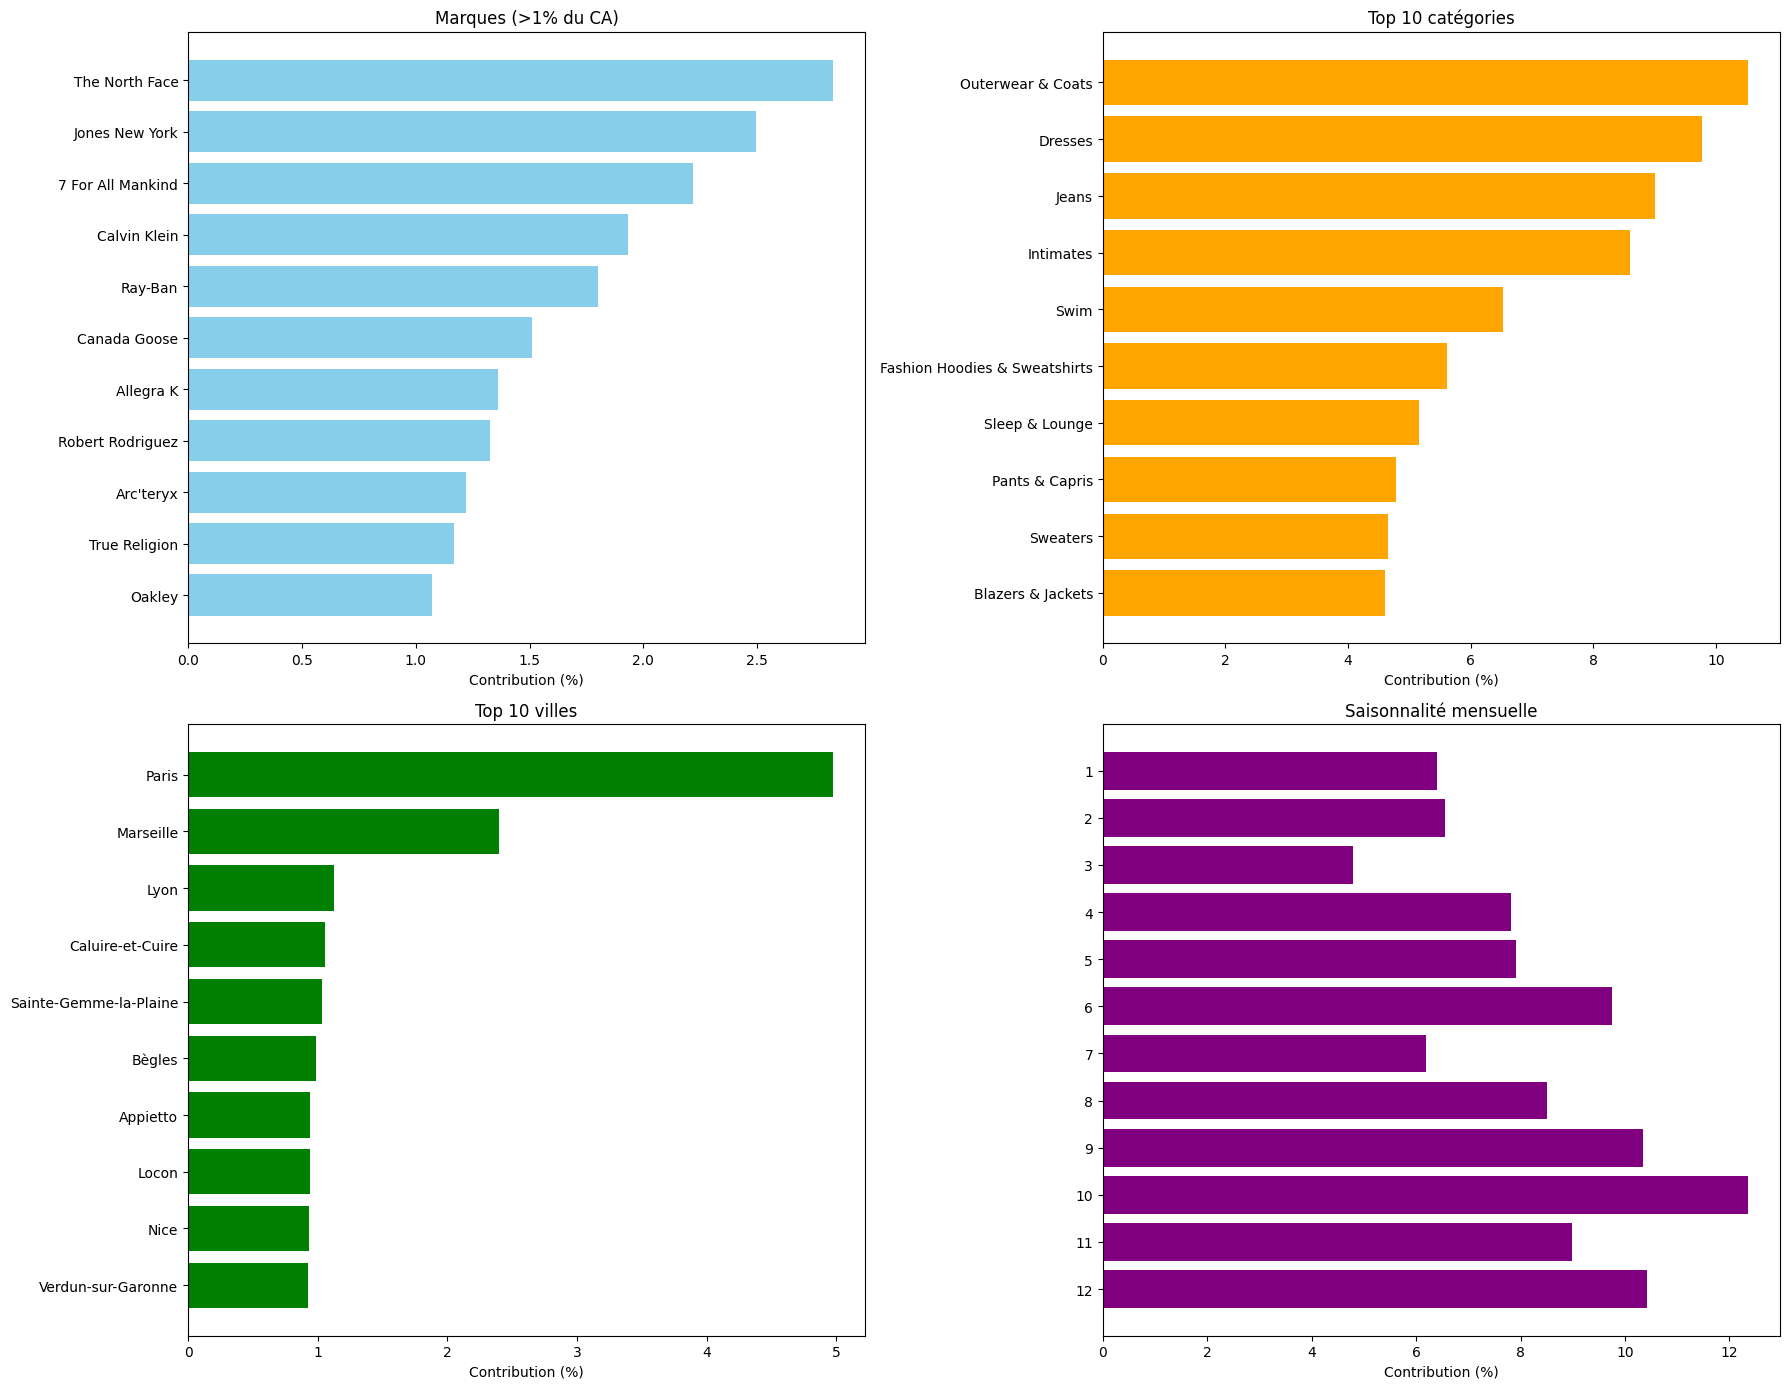

In [106]:

# -------------------------
# Préparation des données
# -------------------------

# Total CA
total_ventes = df['sale_price'].sum()

# Marques (>1%)
marque_contrib = df.groupby('brand')['sale_price'].sum().sort_values(ascending=False)
marque_pct = marque_contrib / total_ventes * 100
marque_top = marque_pct[marque_pct > 1]

# Catégories (top 10)
categorie_contrib = df.groupby('category')['sale_price'].sum().sort_values(ascending=False)
categorie_top = (categorie_contrib / total_ventes * 100).head(10)

# Villes (top 10)
ville_contrib = df.groupby('city')['sale_price'].sum().sort_values(ascending=False)
ville_top = (ville_contrib / total_ventes * 100).head(10)

# Saisonnalité mensuelle
df['order_created_at'] = pd.to_datetime(df['order_created_at'])
df['month'] = df['order_created_at'].dt.month
month_contrib = df.groupby('month')['sale_price'].sum()
month_pct = (month_contrib / total_ventes * 100).sort_index()

# -------------------------
# Création des subplots
# -------------------------
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# --- Marques ---
axes[0,0].barh(marque_top.index, marque_top.values, color='skyblue')
axes[0,0].invert_yaxis()
axes[0,0].set_title("Marques (>1% du CA)")
axes[0,0].set_xlabel("Contribution (%)")

# --- Catégories ---
axes[0,1].barh(categorie_top.index, categorie_top.values, color='orange')
axes[0,1].invert_yaxis()
axes[0,1].set_title("Top 10 catégories")
axes[0,1].set_xlabel("Contribution (%)")

# --- Villes ---
axes[1,0].barh(ville_top.index, ville_top.values, color='green')
axes[1,0].invert_yaxis()
axes[1,0].set_title("Top 10 villes")
axes[1,0].set_xlabel("Contribution (%)")

# --- Saisonnalité mensuelle ---
axes[1,1].barh(month_pct.index.astype(str), month_pct.values, color='purple')
axes[1,1].invert_yaxis()
axes[1,1].set_title("Saisonnalité mensuelle")
axes[1,1].set_xlabel("Contribution (%)")

plt.tight_layout()
plt.show()


In [95]:
df["sale_price"].sum()

np.float64(95739.55013930798)

In [108]:
df["sale_price"].sum() - df["cost"].sum()

np.float64(49634.099091196986)

In [109]:
CA = df["sale_price"].sum()

ca_par_commande = df.groupby("order_id")["sale_price"].sum()
nb_commandes_payantes = (ca_par_commande > 0).sum()

panier_moyen = CA / nb_commandes_payantes
panier_moyen


np.float64(85.7113251023348)

In [110]:
# Lignes retournées
retours = df[df["item_status"] == "Returned"].shape[0]

# Lignes vendues (livrées ou expédiées)
vendues = df[df["item_status"].isin(["Shipped", "Delivered"])].shape[0]

taux_retour = retours / (vendues + retours)
taux_retour


0.2980225988700565